In [1]:
#%pip install pandas matplotlib

In [2]:
from collections import defaultdict

import pandas as pd
from lxml import etree

nsmap = {"": "http://www.tei-c.org/ns/1.0"}

In [3]:
xml_paths = [
    "../data/gold/10.1111_1467-6478.00057.xml",
    "../data/gold/10.1111_1467-6478.00080.xml",
    "../data/gold/10.1515_zfrs-1980-0103.xml",
    "../data/gold/10.1515_zfrs-1980-0104.xml"
]

In [4]:
counts = defaultdict(int)
for file in xml_paths:
    tree = etree.parse(file)
    bibl_structs = tree.findall(".//biblStruct", namespaces=nsmap)
    for bs in bibl_structs[:None]:
        for el in bs.findall(".//*"):
            tag = etree.QName(el).localname
                
            attributes = "_".join([f"{k}-{v}" for k, v in el.attrib.items() if k not in ("from", "to", "when", "source")])
            if attributes:
                tag += "_" + attributes

            counts[tag] += 1

# a bit of cleaning after first inspection
# for key in ["imprint", "forename", "surname", "analytic", "monogr", "persName"]:
#     counts.pop(key)

counts;

In [5]:
df = pd.DataFrame([counts])

<Axes: >

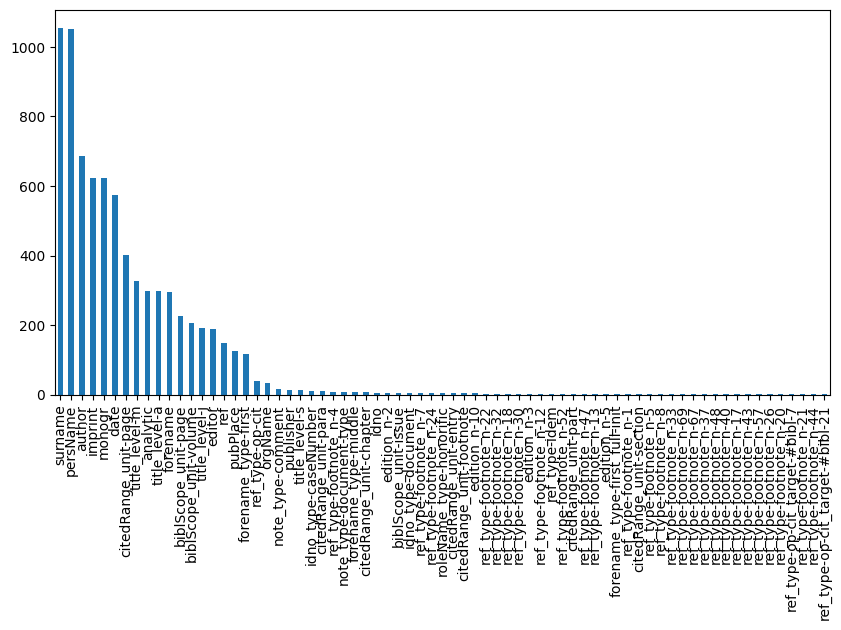

In [6]:
values = df.iloc[0].values
df.iloc[0, list(reversed(values.argsort()))].plot(kind="bar", figsize=(10,5))

<Axes: >

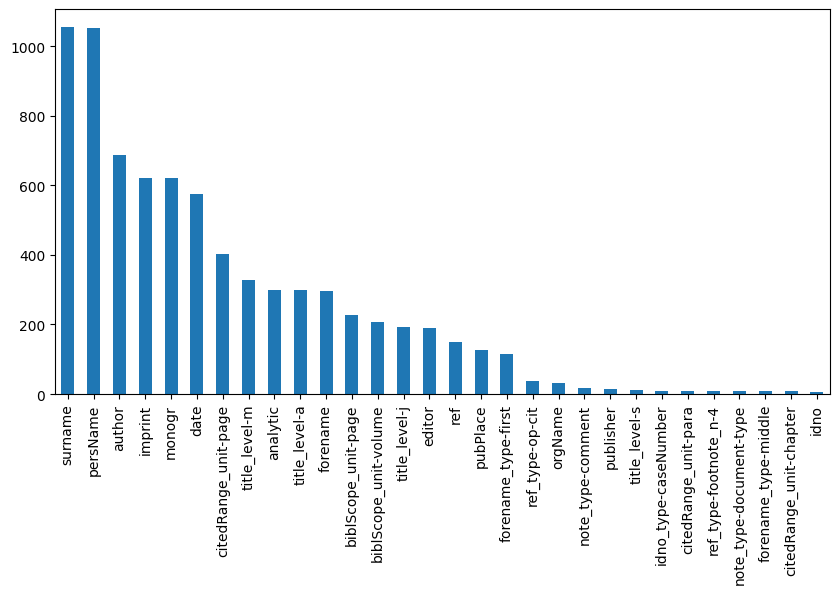

In [14]:
df.iloc[0, list(reversed(values.argsort()))[:30]].plot(kind="bar", figsize=(10,5))

## analytic vs monogr

In [ ]:
# analytic without analytic_title and vice versa?
counts = defaultdict(int)
for file in xml_paths:
    tree = etree.parse(file)
    bibl_structs = tree.findall(".//biblStruct", namespaces=nsmap)
    for bs in bibl_structs[:None]:
        analytic = bs.find("analytic", namespaces=nsmap)
        if analytic is not None:
            counts["analytic"] += 1
            if analytic.find("title[@level='a']", namespaces=nsmap) is not None:
                counts["analytic_title"] += 1
            else:
                print(etree.tostring(analytic, pretty_print=True).decode())
        else:
            if bs.find(".//title[@level='a']", namespaces=nsmap) is not None:
                counts["analytic_title_only"] += 1

counts

In [ ]:
# what kind of titles are in monogr?
counts = defaultdict(int)
for file in xml_paths:
    tree = etree.parse(file)
    bibl_structs = tree.findall(".//biblStruct", namespaces=nsmap)
    for bs in bibl_structs[:None]:
        monogr = bs.find("monogr", namespaces=nsmap)
        if monogr is not None:
            counts["monograph"] += 1
            if monogr.find("title[@level='m']", namespaces=nsmap) is not None:
                counts["monogr_title_m"] += 1
            if monogr.find("title[@level='a']", namespaces=nsmap) is not None:
                counts["monogr_title_a"] += 1
            if monogr.find("title[@level='j']", namespaces=nsmap) is not None:
                counts["monogr_title_j"] += 1
            if monogr.find("title[@level='s']", namespaces=nsmap) is not None:
                counts["monogr_title_s"] += 1
            if monogr.find("title[@level='u']", namespaces=nsmap) is not None:
                counts["monogr_title_u"] += 1
            if monogr.find("title", namespaces=nsmap) is None:
                counts["no_title"] += 1
            text = ""
            for tag in monogr.findall(".//*", namespaces=nsmap):
                text += getattr(tag, "text", None) or ""
            if not text:
                counts["empty_monogr"] += 1
                print(etree.tostring(bs, pretty_print=True).decode())

            # else:
            #     print(etree.tostring(monogr, pretty_print=True).decode())
        else:
            counts["no_monogr"] += 1

counts

In [ ]:
#what is in analytic?
counts = defaultdict(int)
for file in xml_paths:
    tree = etree.parse(file)
    bibl_structs = tree.findall(".//biblStruct", namespaces=nsmap)
    for bs in bibl_structs[:None]:
        analytic = bs.find("analytic", namespaces=nsmap)
        if analytic is not None:
            counts["analytic"] += 1
            for tag in analytic.findall(".//"):
                counts[tag.tag] += 1
                text = getattr(tag, "text", "")
                if "roleName" in tag.tag:
                    print(text)

counts

In [ ]:
# without titles
counts = defaultdict(int)
for file in xml_paths:
    tree = etree.parse(file)
    bibl_structs = tree.findall(".//biblStruct", namespaces=nsmap)
    for bs in bibl_structs[:None]:
        titles = bs.findall(".//title", namespaces=nsmap)
        if not titles:
            counts["no_titles"] += 1
            print(etree.tostring(bs, pretty_print=True).decode())
        else:
            counts["with_titles"] += 1

counts

In [ ]:
# author in monogr when analytic is present?
counts = defaultdict(int)
for file in xml_paths:
    print(file)
    tree = etree.parse(file)
    bibl_structs = tree.findall(".//biblStruct", namespaces=nsmap)
    for bs in bibl_structs[:None]:
        analytic = bs.find("analytic", namespaces=nsmap)
        monogr = bs.find("monogr", namespaces=nsmap)
        if analytic is not None:
            counts["analytic"] += 1
            if analytic.find("author", namespaces=nsmap) is not None:
                counts["analytic_author"] += 1
            if analytic.find("editor", namespaces=nsmap) is not None:
                counts["analytic_editor"] += 1
            monogr = bs.find("monogr", namespaces=nsmap)
            if monogr is not None:
                counts["monogr"] += 1
                if monogr.find("author", namespaces=nsmap) is not None:
                    counts["monogr_author"] += 1
                    print(etree.tostring(bs, pretty_print=True).decode())
                if monogr.find("editor", namespaces=nsmap) is not None:
                    counts["monogr_editor"] += 1
            else:
                counts["analytic_only"] += 1

        elif monogr is not None:
            counts["monogr_only"] += 1
            if monogr.find("author", namespaces=nsmap) is not None:
                counts["monogr_author_only"] += 1
                if monogr.find("editor", namespaces=nsmap) is not None:
                    counts["monogr_author_editor"] += 1
                    print(etree.tostring(bs, pretty_print=True).decode())
            if monogr.find("editor", namespaces=nsmap) is not None:
                counts["monogr_editor_only"] += 1
        
        series = bs.find("series", namespaces=nsmap)
        if series is not None:
            counts["series"] += 1

counts

In [ ]:
# what's in analytic?
counts = defaultdict(int)
for file in xml_paths:
    print(file)
    tree = etree.parse(file)
    bibl_structs = tree.findall(".//biblStruct", namespaces=nsmap)
    for bs in bibl_structs[:None]:
        analytic = bs.find("analytic", namespaces=nsmap)
        if analytic is not None:
            counts["analytic"] += 1
            if analytic.find("imprint", namespaces=nsmap):
                counts["imprint"] += 1
            if analytic.find("biblScope", namespaces=nsmap):
                counts["biblScope"] += 1
            if analytic.find("author", namespaces=nsmap) is not None:
                counts["analytic_author"] += 1
            if analytic.find("editor", namespaces=nsmap) is not None:
                counts["analytic_editor"] += 1
            monogr = bs.find("monogr", namespaces=nsmap)
            if monogr is not None:
                counts["monogr"] += 1
                if monogr.find("author", namespaces=nsmap) is not None:
                    counts["monogr_author"] += 1
                    print(etree.tostring(bs, pretty_print=True).decode())
                if monogr.find("editor", namespaces=nsmap) is not None:
                    counts["monogr_editor"] += 1
            else:
                counts["analytic_only"] += 1

        elif monogr is not None:
            counts["monogr_only"] += 1
            if monogr.find("author", namespaces=nsmap) is not None:
                counts["monogr_author_only"] += 1
                if monogr.find("editor", namespaces=nsmap) is not None:
                    counts["monogr_author_editor"] += 1
                    print(etree.tostring(bs, pretty_print=True).decode())
            if monogr.find("editor", namespaces=nsmap) is not None:
                counts["monogr_editor_only"] += 1
        
        series = bs.find("series", namespaces=nsmap)
        if series is not None:
            counts["series"] += 1

counts

In [ ]:
root = etree.Element("TEI", nsmap={None: "check"})
test = etree.SubElement(root, "test")
test2 = etree.SubElement(test, "test2", nsmap={None: "check"})
print(test.find("test2", namespaces={None: "check"}))
#test = etree.SubElement(root, "test")
print(etree.tostring(root, pretty_print=True).decode())